In [1]:
# @title Plotting functions
import numpy
from numpy.linalg import inv, eig
from math import ceil
from matplotlib import pyplot, ticker, get_backend, rc
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle

def plot_range_3_by_2_matrix(matrix):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Make data

    x = []
    y = []
    z = []
    for a1 in range(-10, 10, 1):
      for a2 in range(-10, 10, 1):
          vec = a1*matrix[:,0]+a2*matrix[:,1]
          x1, y1, z1 = vec
          x.append(x1)
          y.append(y1)
          z.append(z1)

    ax.scatter(np.array(x), np.array(y), np.array(z), color='b')

def plot_null_2_by_3_matrix(matrix):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Make data

    basis = scipy.linalg.null_space(matrix)
    x = []
    y = []
    z = []
    for a1 in range(-10, 10, 1):
      for a2 in range(-10, 10, 1):

          vec = a1*basis[:,0]
          if basis.shape[1]==2:
            vec += a2*basis[:,1]
          x1, y1, z1 = vec
          x.append(x1)
          y.append(y1)
          z.append(z1)

    ax.scatter(np.array(x), np.array(y), np.array(z), color='b')


_int_backends = ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg',
                 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo',
                 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo']
_backend = get_backend()   # get current backend name

# shrink figsize and fontsize when using %matplotlib notebook
if _backend in _int_backends:
    fontsize = 4
    fig_scale = 0.75
else:
    fontsize = 5
    fig_scale = 1

grey = '#808080'
gold = '#cab18c'   # x-axis grid
lightblue = '#0096d6'  # y-axis grid
green = '#008367'  # x-axis basis vector
red = '#E31937'    # y-axis basis vector
darkblue = '#004065'

pink, yellow, orange, purple, brown = '#ef7b9d', '#fbd349', '#ffa500', '#a35cff', '#731d1d'

quiver_params = {'angles': 'xy',
                 'scale_units': 'xy',
                 'scale': 1,
                 'width': 0.012}

grid_params = {'linewidth': 0.5,
               'alpha': 0.8}

def set_rc(func):
    def wrapper(*args, **kwargs):
        rc('font', family='serif', size=fontsize)
        rc('figure', dpi=200)
        rc('axes', axisbelow=True, titlesize=5)
        rc('lines', linewidth=1)
        func(*args, **kwargs)
    return wrapper

@set_rc
def plot_vector(vectors, tails=None):
    ''' Draw 2d vectors based on the values of the vectors and the position of their tails.
    
    Parameters
    ----------
    vectors : list.
        List of 2-element array-like structures, each represents a 2d vector.
    
    tails : list, optional.
        List of 2-element array-like structures, each represents the coordinates of the tail
        of the corresponding vector in vectors. If None (default), all tails are set at the
        origin (0,0). If len(tails) is 1, all tails are set at the same position. Otherwise,
        vectors and tails must have the same length.
    
    Examples
    --------
    >>> v = [(1, 3), (3, 3), (4, 6)]
    >>> plot_vector(v)      # draw 3 vectors with their tails at origin
    >>> t = [numpy.array((2, 2))]
    >>> plot_vector(v, t)   # draw 3 vectors with their tails at (2,2)
    >>> t = [[3, 2], [-1, -2], [3, 5]]
    >>> plot_vector(v, t)   # draw 3 vectors with 3 different tails

    '''   
    vectors = numpy.array(vectors)
    assert vectors.shape[1] == 2, "Each vector should have 2 elements."  
    if tails is not None:
        tails = numpy.array(tails)
        assert tails.shape[1] == 2, "Each tail should have 2 elements."
    else:
        tails = numpy.zeros_like(vectors)
    
    # tile vectors or tails array if needed
    nvectors = vectors.shape[0]
    ntails = tails.shape[0]
    if nvectors == 1 and ntails > 1:
        vectors = numpy.tile(vectors, (ntails, 1))
    elif ntails == 1 and nvectors > 1:
        tails = numpy.tile(tails, (nvectors, 1))
    else:
        assert tails.shape == vectors.shape, "vectors and tail must have a same shape"

    # calculate xlimit & ylimit
    heads = tails + vectors
    limit = numpy.max(numpy.abs(numpy.hstack((tails, heads))))
    limit = numpy.ceil(limit * 1.2)   # add some margins
    
    figsize = numpy.array([2,2]) * fig_scale
    figure, axis = pyplot.subplots(figsize=figsize)
    axis.quiver(tails[:,0], tails[:,1], vectors[:,0], vectors[:,1], color=darkblue, 
                  angles='xy', scale_units='xy', scale=1)
    axis.set_xlim([-limit, limit])
    axis.set_ylim([-limit, limit])
    axis.set_aspect('equal')

    # if xticks and yticks of grid do not match, choose the finer one
    xticks = axis.get_xticks()
    yticks = axis.get_yticks()
    dx = xticks[1] - xticks[0]
    dy = yticks[1] - yticks[0]
    base = max(int(min(dx, dy)), 1)   # grid interval is always an integer
    loc = ticker.MultipleLocator(base=base)
    axis.xaxis.set_major_locator(loc)
    axis.yaxis.set_major_locator(loc)
    axis.grid(True, **grid_params)
    
    # show x-y axis in the center, hide frames
    axis.spines['left'].set_position('center')
    axis.spines['bottom'].set_position('center')
    axis.spines['right'].set_color('none')
    axis.spines['top'].set_color('none')

@set_rc
def plot_transformation_helper(axis, matrix, *vectors, unit_vector=True, unit_circle=False, title=None):
    """ A helper function to plot the linear transformation defined by a 2x2 matrix.
    
    Parameters
    ----------
    axis : class matplotlib.axes.Axes.
        The axes to plot on.

    matrix : class numpy.ndarray.
        The 2x2 matrix to visualize.

    *vectors : class numpy.ndarray.
        The vector(s) to plot along with the linear transformation. Each array denotes a vector's
        coordinates before the transformation and must have a shape of (2,). Accept any number of vectors. 
    
    unit_vector : bool, optional.
        Whether to plot unit vectors of the standard basis, default to True.
    
    unit_circle: bool, optional.
        Whether to plot unit circle, default to False.
    
    title: str, optional.
        Title of the plot.

    """
    assert matrix.shape == (2,2), "the input matrix must have a shape of (2,2)"
    grid_range = 20
    x = numpy.arange(-grid_range, grid_range+1)
    X_, Y_ = numpy.meshgrid(x,x)
    I = matrix[:,0]
    J = matrix[:,1]
    X = I[0]*X_ + J[0]*Y_
    Y = I[1]*X_ + J[1]*Y_
    origin = numpy.zeros(1)
        
    # draw grid lines
    for i in range(x.size):
        axis.plot(X[i,:], Y[i,:], c=gold, **grid_params)
        axis.plot(X[:,i], Y[:,i], c=lightblue, **grid_params)
    
    # draw (transformed) unit vectors
    if unit_vector:
        axis.quiver(origin, origin, [I[0]], [I[1]], color=green, **quiver_params)
        axis.quiver(origin, origin, [J[0]], [J[1]], color=red, **quiver_params)

    # draw optional vectors
    color_cycle = cycle([pink, darkblue, orange, purple, brown])
    if vectors:
        for vector in vectors:
            color = next(color_cycle)
            vector_ = matrix @ vector.reshape(-1,1)
            axis.quiver(origin, origin, [vector_[0]], [vector_[1]], color=color, **quiver_params)

    # draw optional unit circle
    if unit_circle:
        alpha =  numpy.linspace(0, 2*numpy.pi, 41)
        circle = numpy.vstack((numpy.cos(alpha), numpy.sin(alpha)))
        circle_trans = matrix @ circle
        axis.plot(circle_trans[0], circle_trans[1], color=red, lw=0.8)

    # hide frames, set xlimit & ylimit, set title
    limit = 4
    axis.spines['left'].set_position('center')
    axis.spines['bottom'].set_position('center')
    axis.spines['left'].set_linewidth(0.3)
    axis.spines['bottom'].set_linewidth(0.3)
    axis.spines['right'].set_color('none')
    axis.spines['top'].set_color('none')
    axis.set_xlim([-limit, limit])
    axis.set_ylim([-limit, limit])
    if title is not None:
        axis.set_title(title)

@set_rc
def plot_linear_transformation(matrix, *vectors, unit_vector=True, unit_circle=False):
    """ Plot the linear transformation defined by a 2x2 matrix using the helper
    function plot_transformation_helper(). It will create 2 subplots to visualize some
    vectors before and after the transformation.
    
    Parameters
    ----------
    matrix : class numpy.ndarray.
        The 2x2 matrix to visualize.

    *vectors : class numpy.ndarray.
        The vector(s) to plot along with the linear transformation. Each array denotes a vector's
        coordinates before the transformation and must have a shape of (2,). Accept any number of vectors.
    
    unit_vector : bool, optional.
        Whether to plot unit vectors of the standard basis, default to True.
    
    unit_circle: bool, optional.
        Whether to plot unit circle, default to False.
    
    """
    figsize = numpy.array([4,2]) * fig_scale
    figure, (axis1, axis2) = pyplot.subplots(1, 2, figsize=figsize)
    plot_transformation_helper(axis1, numpy.identity(2), *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='Before transformation')
    plot_transformation_helper(axis2, matrix, *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='After transformation')

@set_rc
def plot_linear_transformations(*matrices, unit_vector=True, unit_circle=False):
    """ Plot the linear transformation defined by a sequence of n 2x2 matrices using the helper
    function plot_transformation_helper(). It will create n+1 subplots to visualize some
    vectors before and after each transformation.

    Parameters
    ----------
    *matrices : class numpy.ndarray.
        The 2x2 matrices to visualize. Accept any number of matrices.
    
    unit_vector : bool, optional.
        Whether to plot unit vectors of the standard basis, default to True.
    
    unit_circle: bool, optional.
        Whether to plot unit circle, default to False.
      
    """
    nplots = len(matrices) + 1
    nx = 2
    ny = ceil(nplots/nx)
    figsize = numpy.array([2*nx, 2*ny]) * fig_scale
    figure, axes = pyplot.subplots(nx, ny, figsize=figsize)

    for i in range(nplots):  # fig_idx 
        if i == 0:
            matrix_trans = numpy.identity(2)
            title = 'Before transformation'
        else:
            matrix_trans = matrices[i-1] @ matrix_trans
            if i == 1:
                title = 'After {} transformation'.format(i)
            else:
                title = 'After {} transformations'.format(i)
        plot_transformation_helper(axes[i//nx, i%nx], matrix_trans, unit_vector=unit_vector, unit_circle=unit_circle, title=title)
    # hide axes of the extra subplot (only when nplots is an odd number)
    if nx*ny > nplots:
        axes[-1,-1].axis('off')
        

In [2]:
import numpy as np
import pandas as pd
import math
import scipy
from matplotlib import pyplot as plt
from matplotlib import image
import sklearn

[[ 1  1]
 [-1  1]]


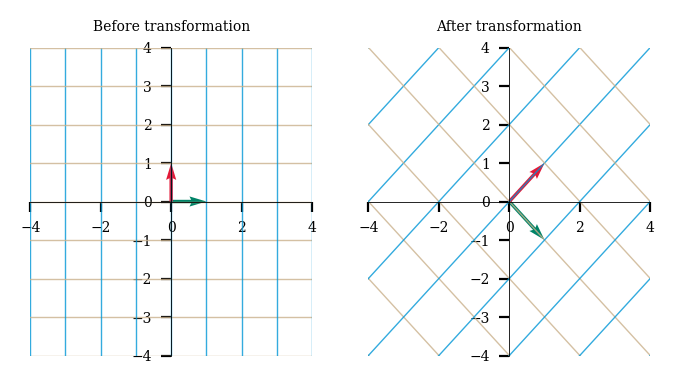

In [3]:
#SECTION IV MATRIX AS A LINEAR TRANSFORMATION....
#Linear Transformation:
#multiplying a matrix with vector menas ---> Applying a Matrix to a Vector
#Which may Scale, Rotate or Translate the Original Vector. 

A= np.array([[1,1],[-1,1]])
print(A)
plot_linear_transformation(A)

V:  [3 1]
V' :  [3 1]


Text(0.5, 1.0, 'After')

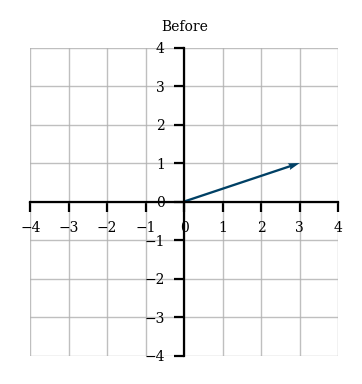

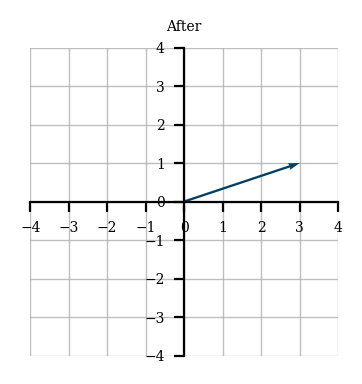

In [7]:
#example ---> IDENTITY APPLIED ON ANY VECTOR doesnot change the VEctor...
I=np.array([[1,0],[0,1]])
v=np.array([3,1])
v2=I.dot(v)

print("V: ", v)
print("V' : ", v2)

plot_vector([v])
plt.title("Before")
plot_vector([v2])
plt.title("After")

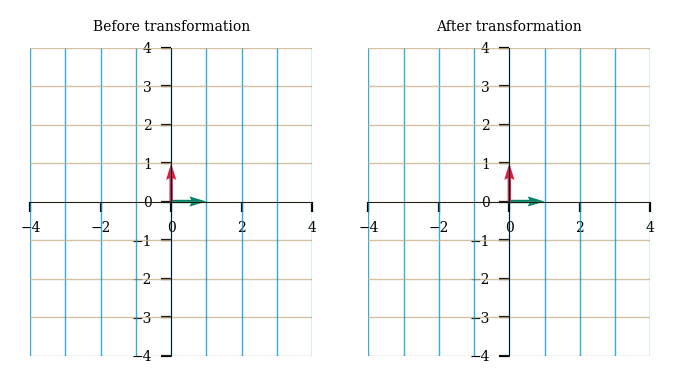

In [8]:
plot_linear_transformation(I) #No change in idenity matrix linear transformation

V:  [3 1]
V' :  [6 4]


Text(0.5, 1.0, 'After')

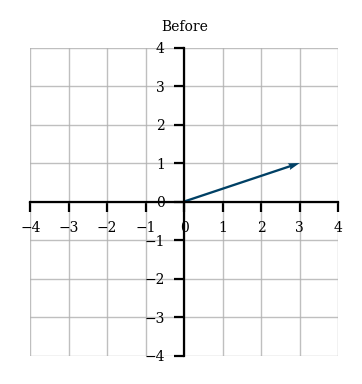

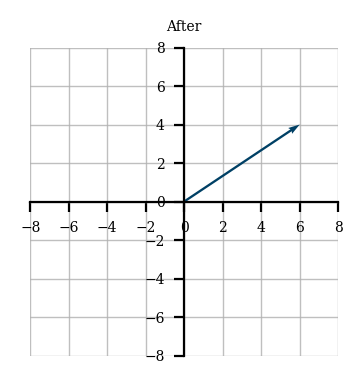

In [9]:
#APPLYING SCALING MATRIX....
sm=np.array([[2,0],[0,4]])
v=np.array([3,1])
v2 = sm.dot(v)


print("V: ", v)
print("V' : ", v2)

plot_vector([v])
plt.title("Before")
plot_vector([v2])
plt.title("After")

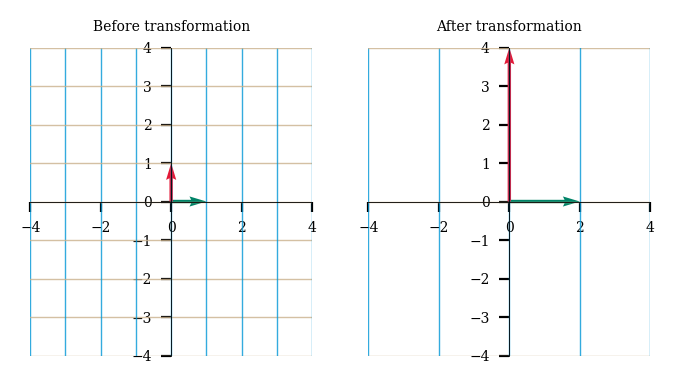

In [10]:
plot_linear_transformation(sm)

In [15]:
#INVERSE OF MATRIX 
v=np.array([6,4])
inv= np.linalg.inv(sm)
v2=inv.dot(v)
print(v)
print(v2)

[6 4]
[3. 1.]


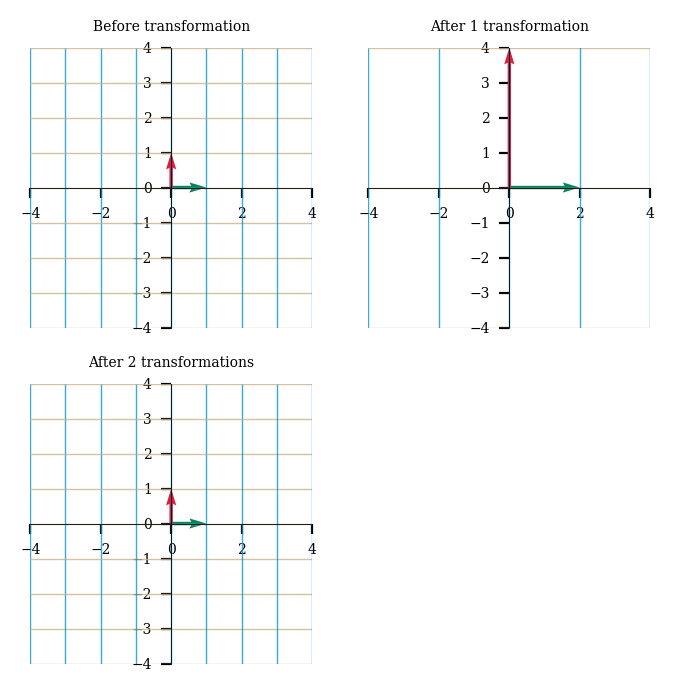

In [17]:
#MULTIPLE TRANSFORMATION AT SAME TIME...
plot_linear_transformations(sm, np.linalg.inv(sm)) 
#after any transformation if we apply inverse of the matrix we get original transformation back

V:  [3 2]
V' :  [ 3 -2]


Text(0.5, 1.0, 'After')

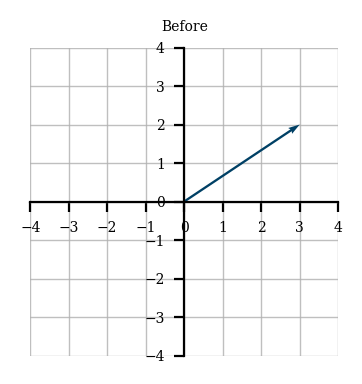

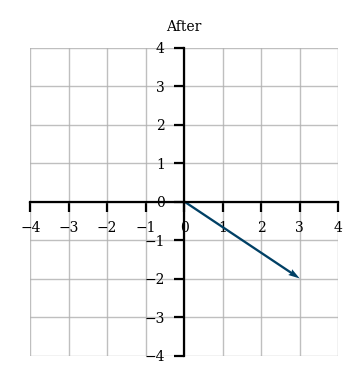

In [20]:
#APPLYING REFLECTION MATRIX...
#about mirror image
#1. reflection about x-axis
rm=np.array([[1,0],[0,-1]])
v=np.array([3,2])
v2 = rm.dot(v)


print("V: ", v)
print("V' : ", v2)

plot_vector([v])
plt.title("Before")
plot_vector([v2])
plt.title("After")

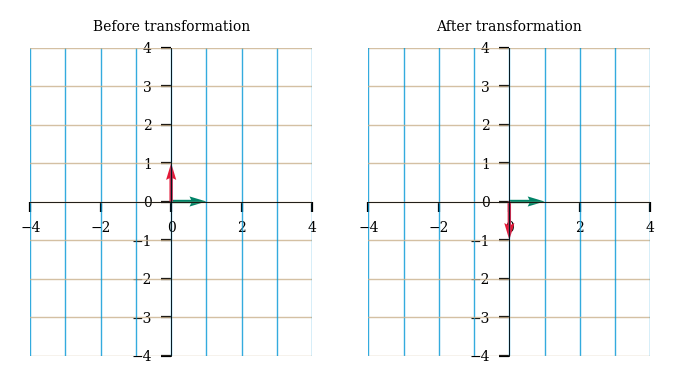

In [26]:
rm=np.array([[1,0],[0,-1]])
plot_linear_transformation(rm) #reflection about x-axis

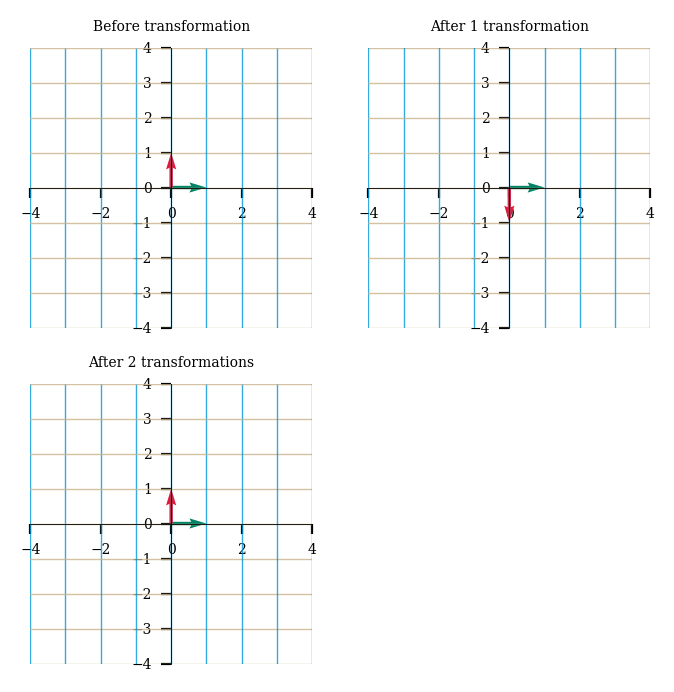

In [30]:
rm=np.array([[1,0],[0,-1]])
plot_linear_transformations(rm, np.linalg.inv(rm)) #reflection about x-axis

V:  [3 2]
V' :  [-3  2]


Text(0.5, 1.0, 'After')

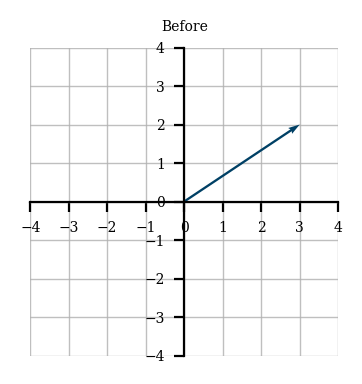

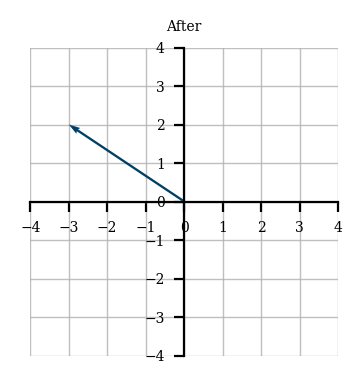

In [21]:
#2. reflection about y-axis
rm=np.array([[-1,0],[0,1]])
v=np.array([3,2])
v2 = rm.dot(v)


print("V: ", v)
print("V' : ", v2)

plot_vector([v])
plt.title("Before")
plot_vector([v2])
plt.title("After")

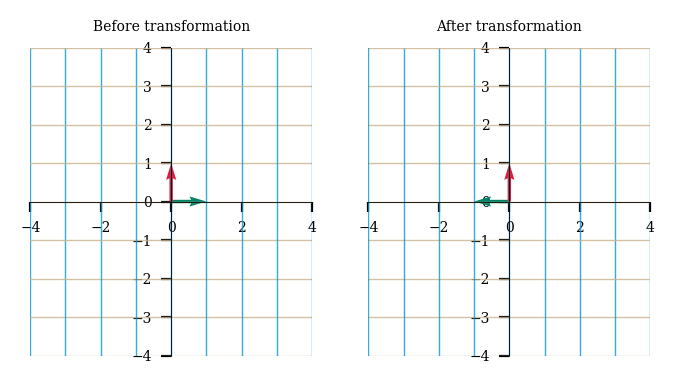

In [27]:
rm=np.array([[-1,0],[0,1]])
plot_linear_transformation(rm) #reflection about y-axis

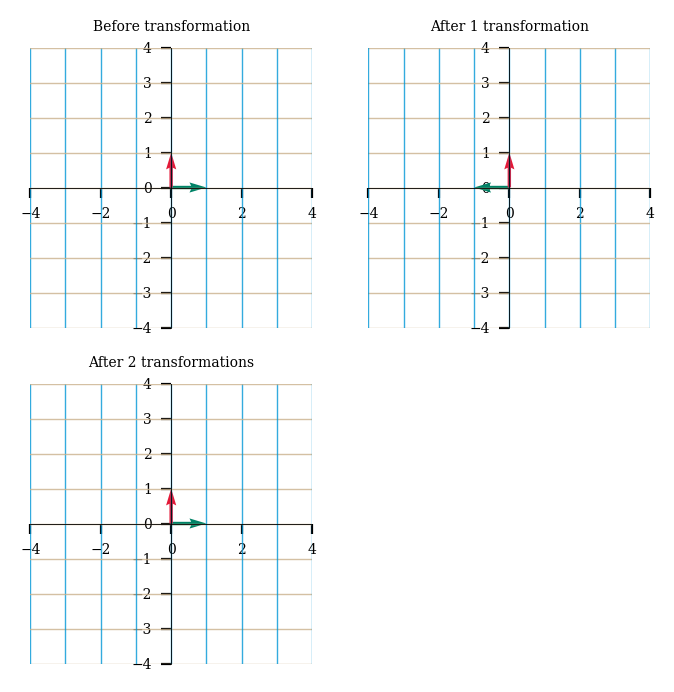

In [31]:
rm=np.array([[-1,0],[0,1]])
plot_linear_transformations(rm, np.linalg.inv(rm)) #reflection about y-axis

V:  [3 2]
V' :  [-3 -2]


Text(0.5, 1.0, 'After')

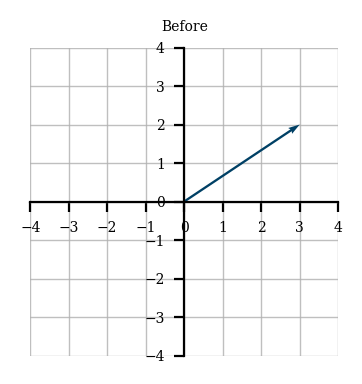

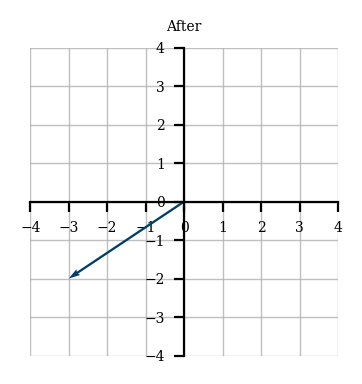

In [22]:
#3. reflection about diagnol
rm=np.array([[-1,0],[0,-1]])
v=np.array([3,2])
v2 = rm.dot(v)


print("V: ", v)
print("V' : ", v2)

plot_vector([v])
plt.title("Before")
plot_vector([v2])
plt.title("After")

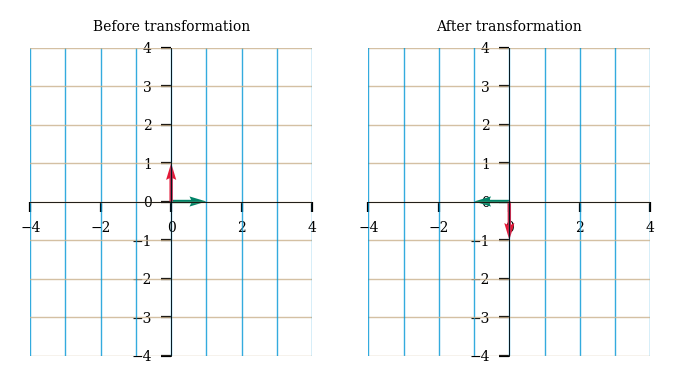

In [28]:
rm=np.array([[-1,0],[0,-1]])
plot_linear_transformation(rm) #reflection about dignol

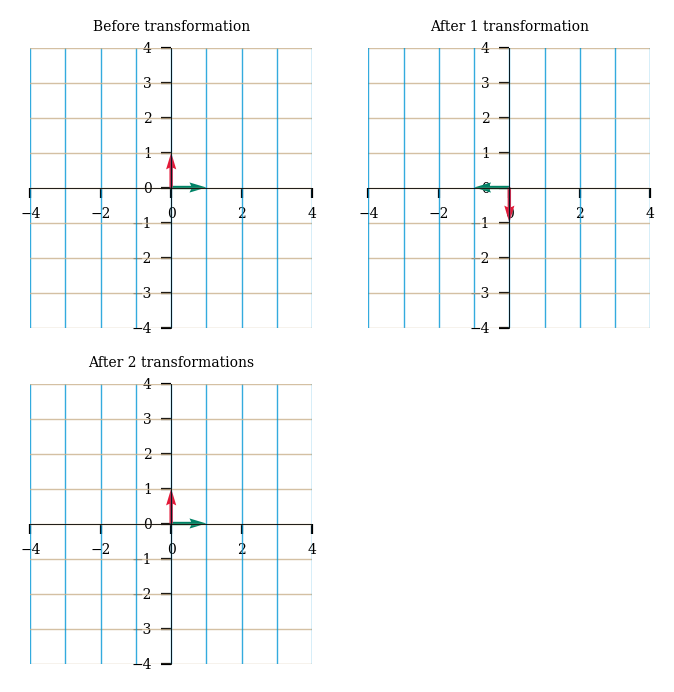

In [32]:
rm=np.array([[-1,0],[0,-1]])
plot_linear_transformations(rm, np.linalg.inv(rm)) #reflection about y-axis

V:  [2 2]
V' :  [8 2]


Text(0.5, 1.0, 'After')

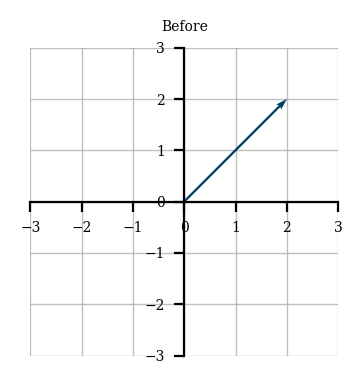

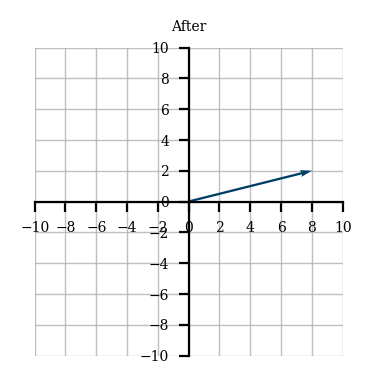

In [33]:
#SHEAR TRANSFORMATION...
#about the image slant...
#1. Shear in X-Direction...
sh_m=np.array([[1,3],[0,1]])
v=np.array([2,2])
v2 = sh_m.dot(v)


print("V: ", v)
print("V' : ", v2)

plot_vector([v])
plt.title("Before")
plot_vector([v2])
plt.title("After")

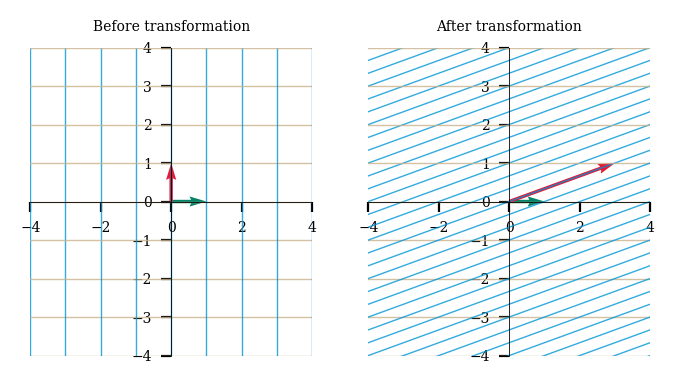

In [34]:
plot_linear_transformation(sh_m)

V:  [2 2]
V' :  [2 8]


Text(0.5, 1.0, 'After')

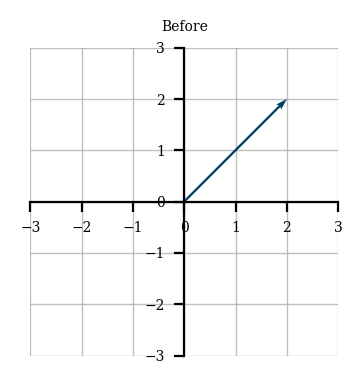

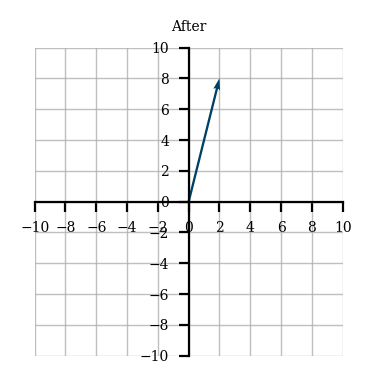

In [35]:
#2. Shear in Y-Direction...
sh_m=np.array([[1,0],[3,1]])
v=np.array([2,2])
v2 = sh_m.dot(v)


print("V: ", v)
print("V' : ", v2)

plot_vector([v])
plt.title("Before")
plot_vector([v2])
plt.title("After")

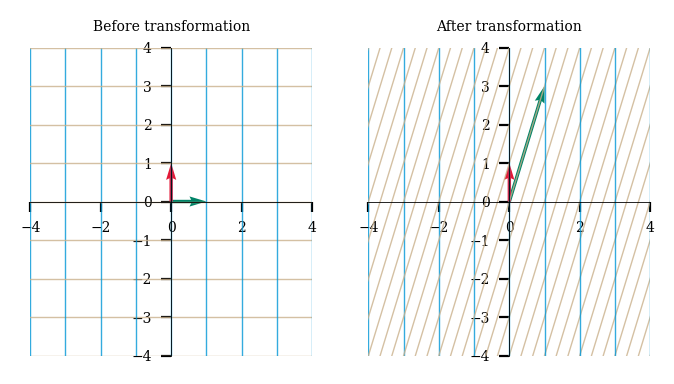

In [36]:
plot_linear_transformation(sh_m)

V:  [2 2]
V' :  [8 8]


Text(0.5, 1.0, 'After')

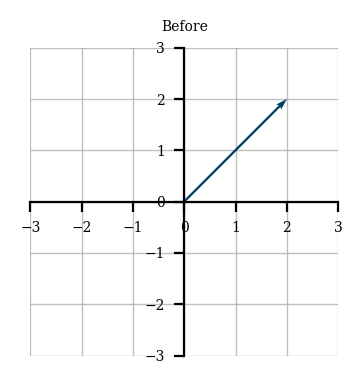

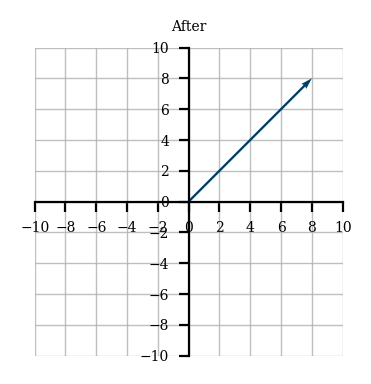

In [37]:
#3. Shear in X,Y both Direction...
sh_m=np.array([[1,3],[3,1]])
v=np.array([2,2])
v2 = sh_m.dot(v)


print("V: ", v)
print("V' : ", v2)

plot_vector([v])
plt.title("Before")
plot_vector([v2])
plt.title("After")

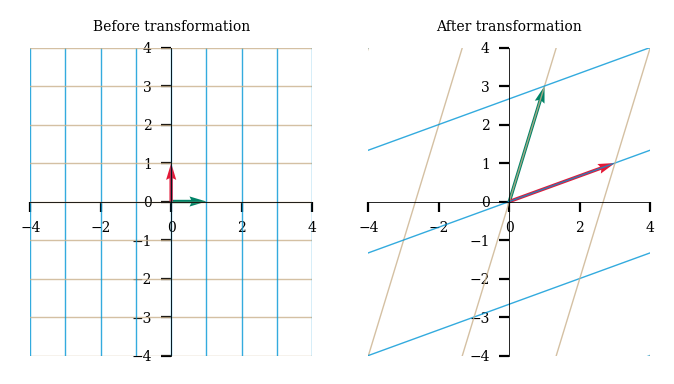

In [38]:
plot_linear_transformation(sh_m)

V:  [2 3]
Vrot:  [-3.  2.]
Rotattion Matrix: 
 [[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]


Text(0.5, 1.0, 'After Transformation')

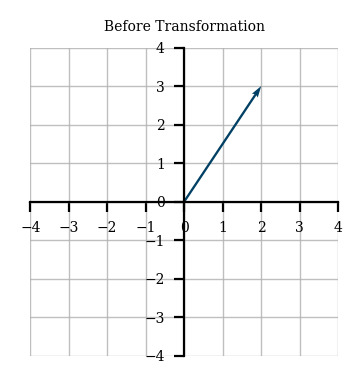

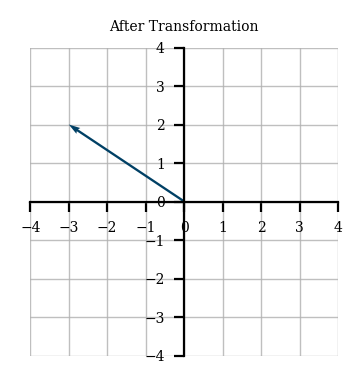

In [41]:
#ROTATION MATRIX....
#1. Clock-Wise
#2. Counter- Clockwise  -- > preferred (we will do this)
v=np.array([2,3])
theta=90 * (math.pi/180) #angles given to functions must be in radians.
rot=np.array([
                [math.cos(theta), -(math.sin(theta))],
                [math.sin(theta), math.cos(theta)]
            ])
v2 = rot.dot(v)
print("V: ", v)
print("Vrot: ", v2)
print("Rotattion Matrix: \n", rot)

plot_vector([v])
plt.title("Before Transformation")
plot_vector([v2])
plt.title("After Transformation")

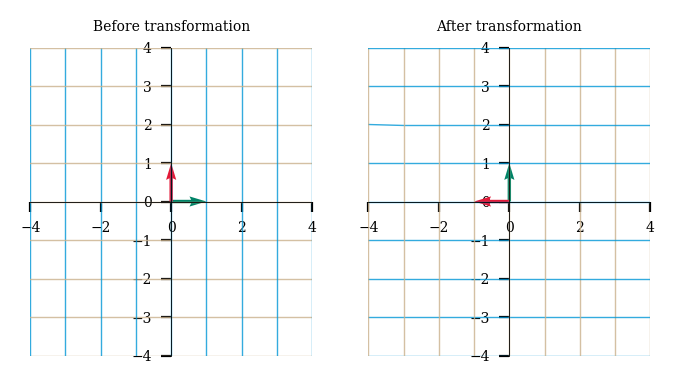

In [42]:
plot_linear_transformation(rot) #both rotated counter clockwise by 90 degrees..

V:  [2 3]
Vrot:  [-0.70710678  3.53553391]
Rotattion Matrix: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Text(0.5, 1.0, 'After Transformation')

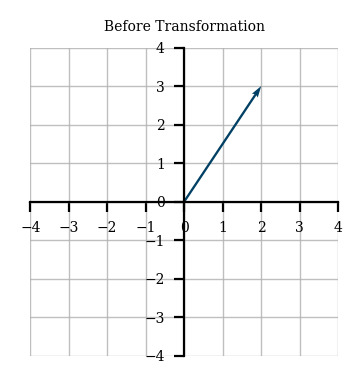

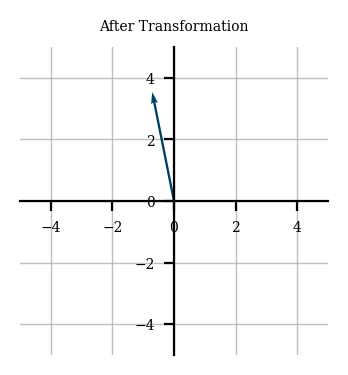

In [43]:
v=np.array([2,3])
theta=45 * (math.pi/180) #angles given to functions must be in radians.
rot=np.array([
                [math.cos(theta), -(math.sin(theta))],
                [math.sin(theta), math.cos(theta)]
            ])
v2 = rot.dot(v)
print("V: ", v)
print("Vrot: ", v2)
print("Rotattion Matrix: \n", rot)

plot_vector([v])
plt.title("Before Transformation")
plot_vector([v2])
plt.title("After Transformation")

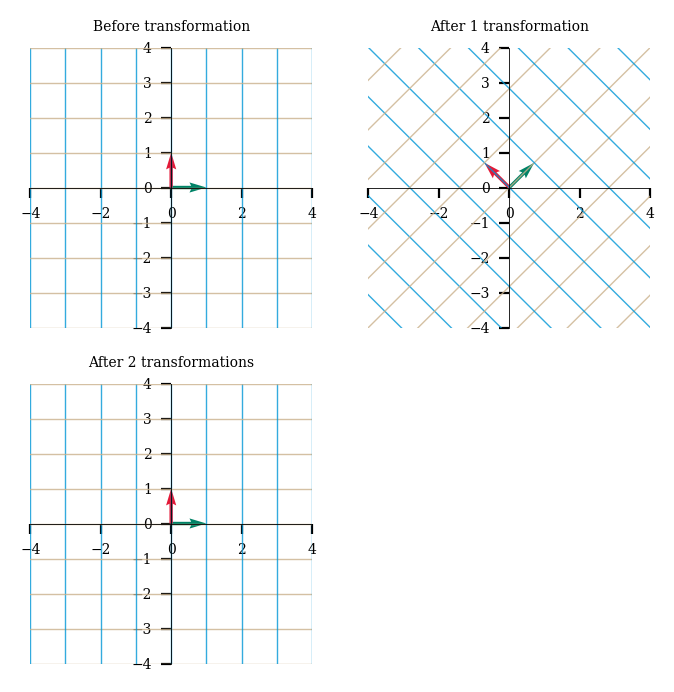

In [46]:
plot_linear_transformations(rot, np.linalg.inv(rot))

In [47]:
#TRANSLATION MATRIX..
#not lies under linear transformation cause it involves origin changes which is not possible in linear transformations...

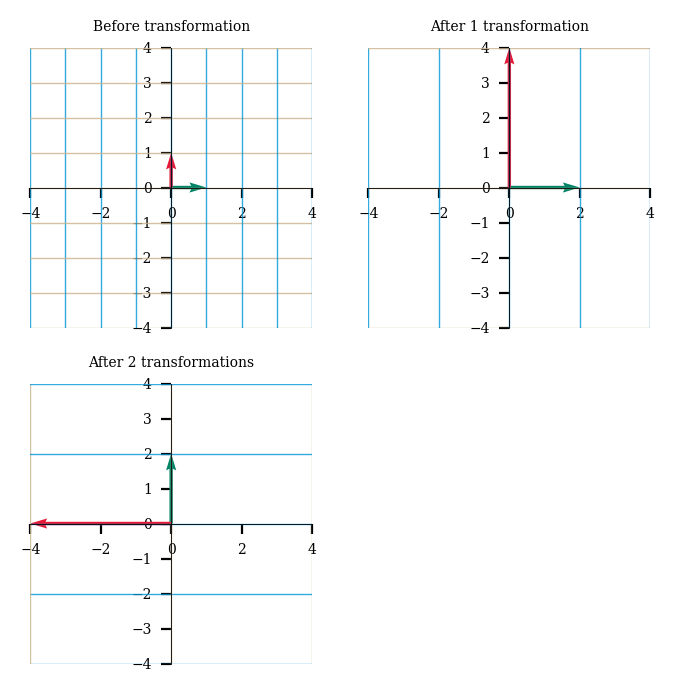

In [49]:
#MULTIPLE TRANSFORMATIONS...
scale=np.array([[2,0],[0,4]])
theta=90 * (math.pi/180) #angles given to functions must be in radians.
rot=np.array([
                [math.cos(theta), -(math.sin(theta))],
                [math.sin(theta), math.cos(theta)]
            ])
plot_linear_transformations(scale, rot)

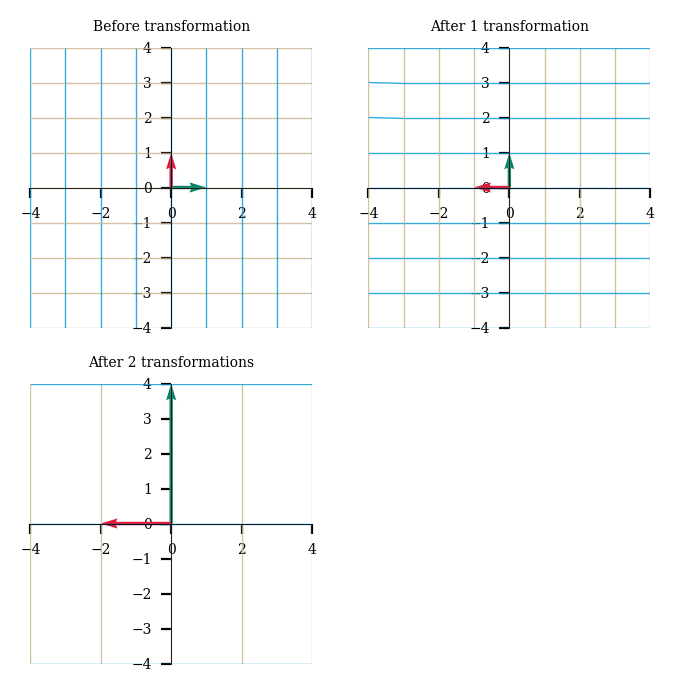

In [50]:
plot_linear_transformations(rot, scale)

In [53]:
#SECTION V EIGEN DECOMPOSITION AND SINGLE VALUE DECOMPOSITION (SVD)....
#1. EIGEN VECTORS AND EIGEN VALUES...
#How to calculate?

A= np.array([[1,2],[3,-4]])
lambdas  , v = np.linalg.eig(A)
print("Eigen Values: ", lambdas)
print("Eigen Vector :\n ", v)

Eigen Values:  [ 2. -5.]
Eigen Vector :
  [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]


First Eigen Vector:  [0.89442719 0.4472136 ]
After Transformation:  [1.78885438 0.89442719]


Text(0.5, 1.0, '$\\ lambda = 2$')

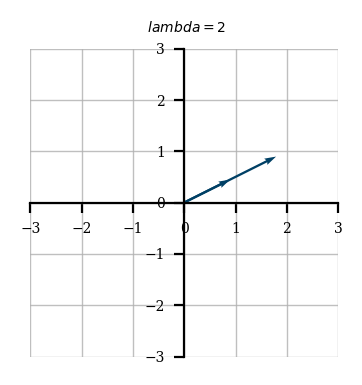

In [60]:
#plotting..
first_ev = v[:,0]
#first_ev = np.array([2,1])
#first_ev = np.array([4,2])
new = np.dot(A, first_ev)
print("First Eigen Vector: ", first_ev)
print("After Transformation: ", new)

vectors=[first_ev, new]
plot_vector(vectors)
plt.title("$\ lambda = 2$")

First Eigen Vector:  [-0.31622777  0.9486833 ]
After Transformation:  [ 1.58113883 -4.74341649]


Text(0.5, 1.0, '$\\ lambda = -5$')

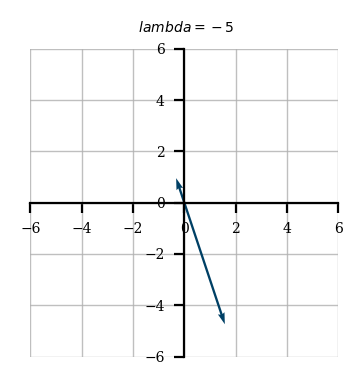

In [59]:
first_ev = v[:,1]
#first_ev = np.array([2,-6])
#first_ev = np.array([3,-9])
new = np.dot(A, first_ev)
print("First Eigen Vector: ", first_ev)
print("After Transformation: ", new)

vectors=[first_ev, new]
plot_vector(vectors)
plt.title("$\ lambda = -5$")

In [61]:
#proof Av = lambdav
first_ev = v[:,0]
lam1 = lambdas[0]
#lhs = A.dot(first_ev)
lhs = A @ first_ev
rhs = lam1 * first_ev
print("First Eigen Vector: ", first_ev)
print("First Eigen Value: ", lam1)
print("Av: ", lhs)
print("𝜆𝑣 : ", rhs)

First Eigen Vector:  [0.89442719 0.4472136 ]
First Eigen Value:  2.0
Av:  [1.78885438 0.89442719]
𝜆𝑣 :  [1.78885438 0.89442719]


In [63]:
#proof Av = lambdav
first_ev = v[:,1]
lam1 = lambdas[1]
#lhs = A.dot(first_ev)
lhs = A @ first_ev
rhs = lam1 * first_ev
print("First Eigen Vector: ", first_ev)
print("First Eigen Value: ", lam1)
print("Av: ", lhs)
print("𝜆𝑣 : ", rhs)

First Eigen Vector:  [-0.31622777  0.9486833 ]
First Eigen Value:  -5.0
Av:  [ 1.58113883 -4.74341649]
𝜆𝑣 :  [ 1.58113883 -4.74341649]


In [65]:
#POINTS TO PONDER...
#1. det(A)  = product(lambdas(A))
det = np.linalg.det(A)
rhs = np.product(lambdas)
print(det)
print(rhs)

-10.000000000000002
-10.0


In [66]:
#2. trace of Matrix = sum of eigen Values...
print("Trace:", np.trace(A))
print("sum of Eigen Values: ", np.sum(lambdas))

Trace: -3
sum of Eigen Values:  -3.0


In [67]:
#3. Eigen Values and Vector of a Diagnol Matrix...
A= np.array([[2,0],[0,2]])
lamb , V = np.linalg.eig(A)
print("Eigen Vector: \n", V)
print("Eigen Values: ", lamb)

Eigen Vector: 
 [[1. 0.]
 [0. 1.]]
Eigen Values:  [2. 2.]


In [68]:
A= np.array([[-1,0],[0,2]])
lamb , V = np.linalg.eig(A)
print("Eigen Vector: \n", V)
print("Eigen Values: ", lamb)

Eigen Vector: 
 [[1. 0.]
 [0. 1.]]
Eigen Values:  [-1.  2.]


In [73]:
#EIGEN DECOMPOSITION...
# A = V^V-1
# V ---> matrix of eigen vectors of A
# ^ ---> capital lambda daignol matrix of eigen values i.e. lmbda1 > lambda2 > lambda 3
# V-1 ---> Inverse of V...
A = np.array([[4,2],[-5, -3]])
lam, V = np.linalg.eig(A)
Lambda = np.diag(lam)
Vin = np.linalg.inv(V)
print("Vector: \n", A, end=" ")
print("\nEigen Vector: \n", V, end=" ")
print("\nEigen Values: \n", Lambda, end=' ')
print("\nInverse of Vector: \n", Vin)

print("Proof of V^V-1: \n", V @ Lambda @ Vin)

Vector: 
 [[ 4  2]
 [-5 -3]] 
Eigen Vector: 
 [[ 0.70710678 -0.37139068]
 [-0.70710678  0.92847669]] 
Eigen Values: 
 [[ 2.  0.]
 [ 0. -1.]] 
Inverse of Vector: 
 [[2.3570226  0.94280904]
 [1.79505494 1.79505494]]
Proof of V^V-1: 
 [[ 4.  2.]
 [-5. -3.]]


In [74]:
#POwer Of A Matrix...
a2=A.dot(A)
a4 = a2.dot(a2)
a8 = a4.dot(a4)
a16 = a8.dot(a8)
a16

array([[ 109226,   43690],
       [-109225,  -43689]])

In [77]:
#EIGEN DECOMPOSITION OF SYMMETRIC MATRIX...
A = np.array([[2,1],[1,2]])
lam, Q = np.linalg.eig(A)
Lamb = np.diag(lam)
Qt = Q.T
print("Vector: \n", A, end=" ")
print("\nEigen Vector: \n", Q, end=" ")
print("\nEigen Values: \n", Lamb, end=' ')
print("\nTranspose of Vector: \n", Qt)

print("Proof of Q^Qt: \n", Q @ Lamb @ Qt)

Vector: 
 [[2 1]
 [1 2]] 
Eigen Vector: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 
Eigen Values: 
 [[3. 0.]
 [0. 1.]] 
Transpose of Vector: 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Proof of Q^Qt: 
 [[2. 1.]
 [1. 2.]]


In [81]:
#SVD----> singular value decomposition...
A = np.array([[1,5,3],[4,2,1],[9,7,6],[3,4,8],[7,5,2]])
U , s, Vt = np.linalg.svd(A)
S = np.diag(s)

print("Original Matrix: \n", A)
print("Left Singular Matrix U: \n",U)
print("Sigma Matrix: \n", S)
print("Right Singular Matrix: \n", Vt)

3print("Proof of Q^Qt: \n", U[:,0:3] @ S @ Vt)

Original Matrix: 
 [[1 5 3]
 [4 2 1]
 [9 7 6]
 [3 4 8]
 [7 5 2]]
Left Singular Matrix U: 
 [[-0.27100758 -0.30553854  0.89172505  0.07283989 -0.18089188]
 [-0.22574406  0.30341591 -0.15540972  0.57451812 -0.7090523 ]
 [-0.68888455  0.17905033 -0.13626746 -0.65730639 -0.2067814 ]
 [-0.44753102 -0.73558093 -0.38129625  0.29931827  0.15381294]
 [-0.44804975  0.49137222  0.12930042  0.37812719  0.63095641]]
Sigma Matrix: 
 [[18.63328108  0.          0.        ]
 [ 0.          5.81591983  0.        ]
 [ 0.          0.          2.82416584]]
Right Singular Matrix: 
 [[-0.63611374 -0.57204583 -0.51780584]
 [ 0.6452016  -0.02630216 -0.76355949]
 [-0.42317161  0.81979983 -0.38581604]]
Proof of Q^Qt: 
 [[1. 5. 3.]
 [4. 2. 1.]
 [9. 7. 6.]
 [3. 4. 8.]
 [7. 5. 2.]]


In [83]:
#SVD WITH NUMPY.....
A = np.array([[1,5,3],[4,2,1],[9,7,6],[3,4,8],[7,5,2]])
U , s, Vt = np.linalg.svd(A, full_matrices=False) #this will use U as 5*3 matrix rather than 5*5
S = np.diag(s)

print("Original Matrix: \n", A)
print("Left Singular Matrix U: \n",U)
print("Sigma Matrix: \n", S)
print("Right Singular Matrix: \n", Vt)

print("Proof of Q^Qt: \n", U @ S @ Vt)

Original Matrix: 
 [[1 5 3]
 [4 2 1]
 [9 7 6]
 [3 4 8]
 [7 5 2]]
Left Singular Matrix U: 
 [[-0.27100758 -0.30553854  0.89172505]
 [-0.22574406  0.30341591 -0.15540972]
 [-0.68888455  0.17905033 -0.13626746]
 [-0.44753102 -0.73558093 -0.38129625]
 [-0.44804975  0.49137222  0.12930042]]
Sigma Matrix: 
 [[18.63328108  0.          0.        ]
 [ 0.          5.81591983  0.        ]
 [ 0.          0.          2.82416584]]
Right Singular Matrix: 
 [[-0.63611374 -0.57204583 -0.51780584]
 [ 0.6452016  -0.02630216 -0.76355949]
 [-0.42317161  0.81979983 -0.38581604]]
Proof of Q^Qt: 
 [[1. 5. 3.]
 [4. 2. 1.]
 [9. 7. 6.]
 [3. 4. 8.]
 [7. 5. 2.]]


In [84]:
#SVD WITH SCIPY....
A = np.array([[1,5,3],[4,2,1],[9,7,6],[3,4,8],[7,5,2]])
U , s, Vt = scipy.linalg.svd(A, full_matrices=False) #this will use U as 5*3 matrix rather than 5*5
S = np.diag(s)

print("Original Matrix: \n", A)
print("Left Singular Matrix U: \n",U)
print("Sigma Matrix: \n", S)
print("Right Singular Matrix: \n", Vt)

print("Proof of Q^Qt: \n", U @ S @ Vt)

Original Matrix: 
 [[1 5 3]
 [4 2 1]
 [9 7 6]
 [3 4 8]
 [7 5 2]]
Left Singular Matrix U: 
 [[-0.27100758 -0.30553854  0.89172505]
 [-0.22574406  0.30341591 -0.15540972]
 [-0.68888455  0.17905033 -0.13626746]
 [-0.44753102 -0.73558093 -0.38129625]
 [-0.44804975  0.49137222  0.12930042]]
Sigma Matrix: 
 [[18.63328108  0.          0.        ]
 [ 0.          5.81591983  0.        ]
 [ 0.          0.          2.82416584]]
Right Singular Matrix: 
 [[-0.63611374 -0.57204583 -0.51780584]
 [ 0.6452016  -0.02630216 -0.76355949]
 [-0.42317161  0.81979983 -0.38581604]]
Proof of Q^Qt: 
 [[1. 5. 3.]
 [4. 2. 1.]
 [9. 7. 6.]
 [3. 4. 8.]
 [7. 5. 2.]]
